In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import matplotlib as mpl
import contextily as cx
import os


In [2]:
filepath = '/Users/todd/GitHub/ecohydrology/Distribution/Info'
# filepath = '/Users/rdel1tes/GitHub/ecohydrology/Distribution/Info'

In [3]:
# colors = ['red', 'orange', 'yellow', 'green', 'blue', 'cyan', 'purple']
# mcolors = mpl.colors.CSS4_COLORS
# colors = []
# for key in mcolors.keys():
#     colors.append(mcolors[key])

In [14]:
def make_colors(ncolors):
    colors = []
    values = list('0123456789ABCDEF')
    for i in range(ncolors):
        hexcolor = '#'
        for j in range(6):
            hexcolor += np.random.choice(values)
        colors.append(hexcolor)
    return colors


In [19]:
colors = make_colors(2000)

## Common coordinate systems

- "EPSG:4326": WGS84 Latitude/Longitude, used in GPS
- "EPSG:3395": Spherical Mercator. Google Maps, OpenStreetMap, Bing Maps
- "EPSG:32633": UTM Zones (North) – (Universal Transverse Mercator)
- "EPSG:32733": UTM Zones (South) – (Universal Transverse Mercator)

In [20]:
df = pd.read_excel(os.path.join(filepath, 'USACE_Offices_and_locations.xlsx'))
offices = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# Set to WGS84. The coordinates in the file above were created in Google Earth.
offices = offices.set_crs('EPSG:4326')

In [21]:
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
states = gpd.read_file(os.path.join('states_21basic/states.shp'))
states = states.to_crs('EPSG:4326')
# North_America = world[world.continent == 'North America']

In [22]:
im = OffsetImage(plt.imread(os.path.join('Corps_Castle.png'), format="png"), zoom=.06)

(25.0, 50.0)

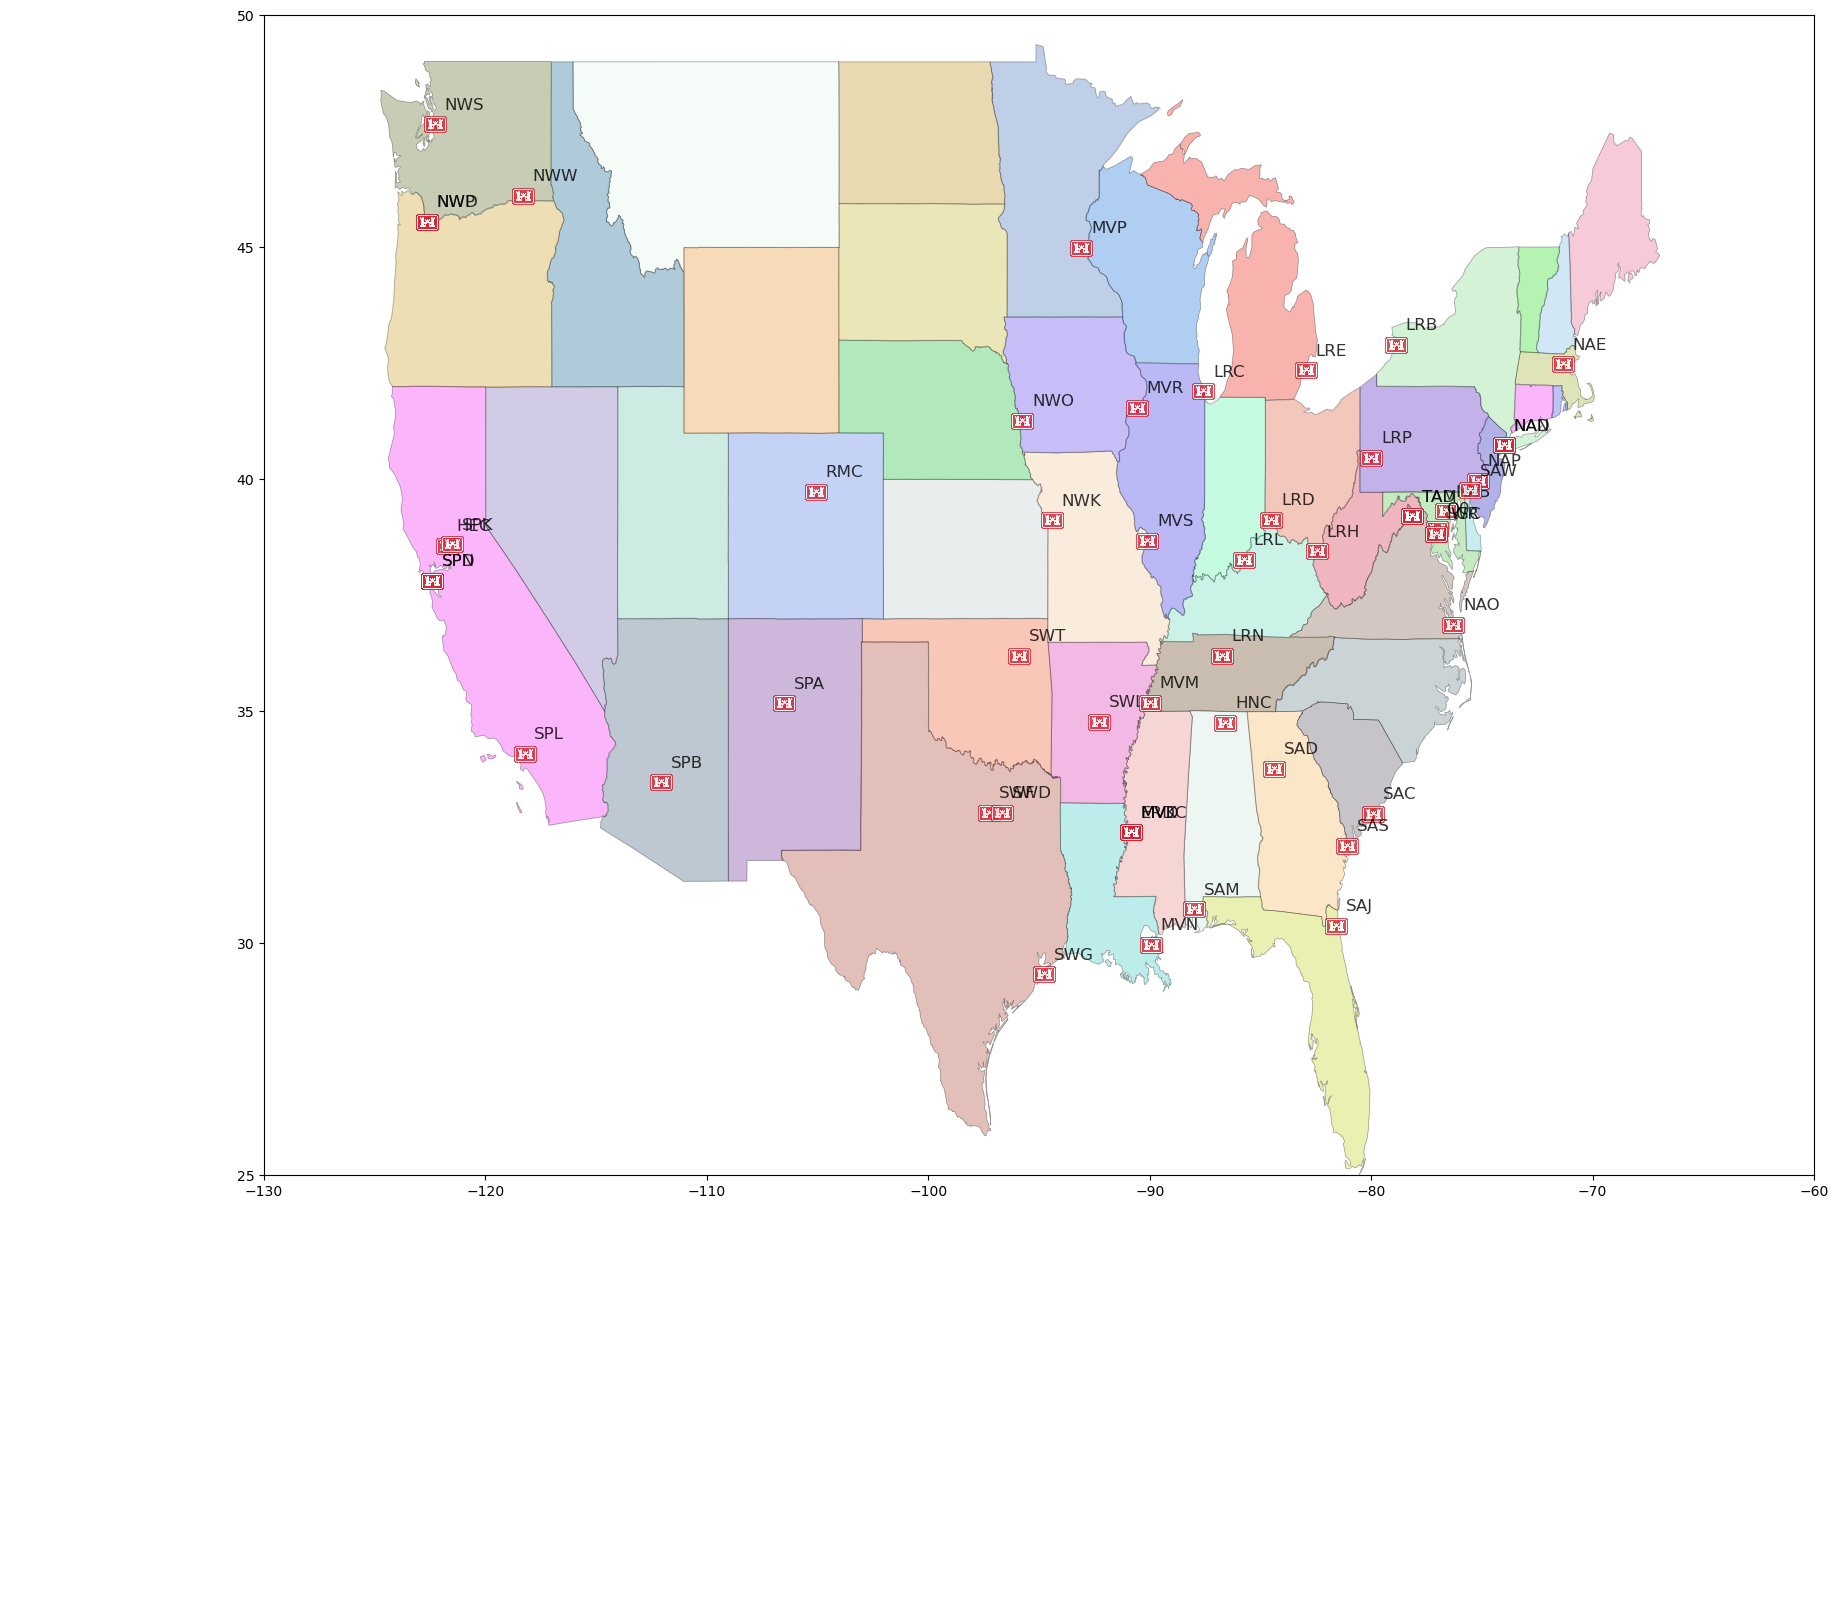

In [29]:
# locations_to_plot = ['RMC', 'SPA', 'SWT', 'NWK', 'NWO', 'SWF', 'MVP']
locations_to_plot = offices.Identifier.values

# fig, ax1 = plt.subplots(1, 1)
# fig.set_size_inches([20,20])
ax1 = offices.plot(figsize=(20,20), marker='o', color='red', markersize=20, alpha=0.5)

# cx.add_basemap(ax1, crs=offices.crs)
# cx.add_basemap(ax1, source=cx.providers.Stamen.Watercolor, zoom=12)
# cx.add_basemap(ax1, source=cx.providers.Stamen.TonerLabels, zoom=10)

# world.boundary.plot(ax=ax1, alpha=0.5)

states.plot(ax=ax1, color='lightgray', linewidth=0.5, edgecolor='black', alpha=0.1)
for state_name in states.STATE_NAME.values:
    color = np.random.choice(colors)
    state = states.loc[states['STATE_NAME'] == state_name]
    state.plot(ax=ax1, alpha=0.3, color=color, linewidth=0.5, edgecolor='black')
for x, y, label in zip(offices.geometry.x, offices.geometry.y, offices.Identifier):
    im = OffsetImage(plt.imread(os.path.join('Corps_Castle.png'), format="png"), zoom=.04, alpha=0.8)
    ab = AnnotationBbox(im, (x, y), frameon=False)
    ax1.add_artist(ab)
    if label in locations_to_plot:
        ax1.annotate(label, xy=(x+0.25, y+0.25), xytext=(3, 3), size=12, textcoords="offset points", alpha=0.8)
ax1.set_xlim([-130,-60])
ax1.set_ylim([25,50])


In [17]:
# Plot in Mercator projection
world_mercator = world.to_crs('epsg:3395')
offices_mercator = offices.to_crs('epsg:3395')
states_mercator = states.to_crs('epsg:3395')

(2500000.0, 6500000.0)

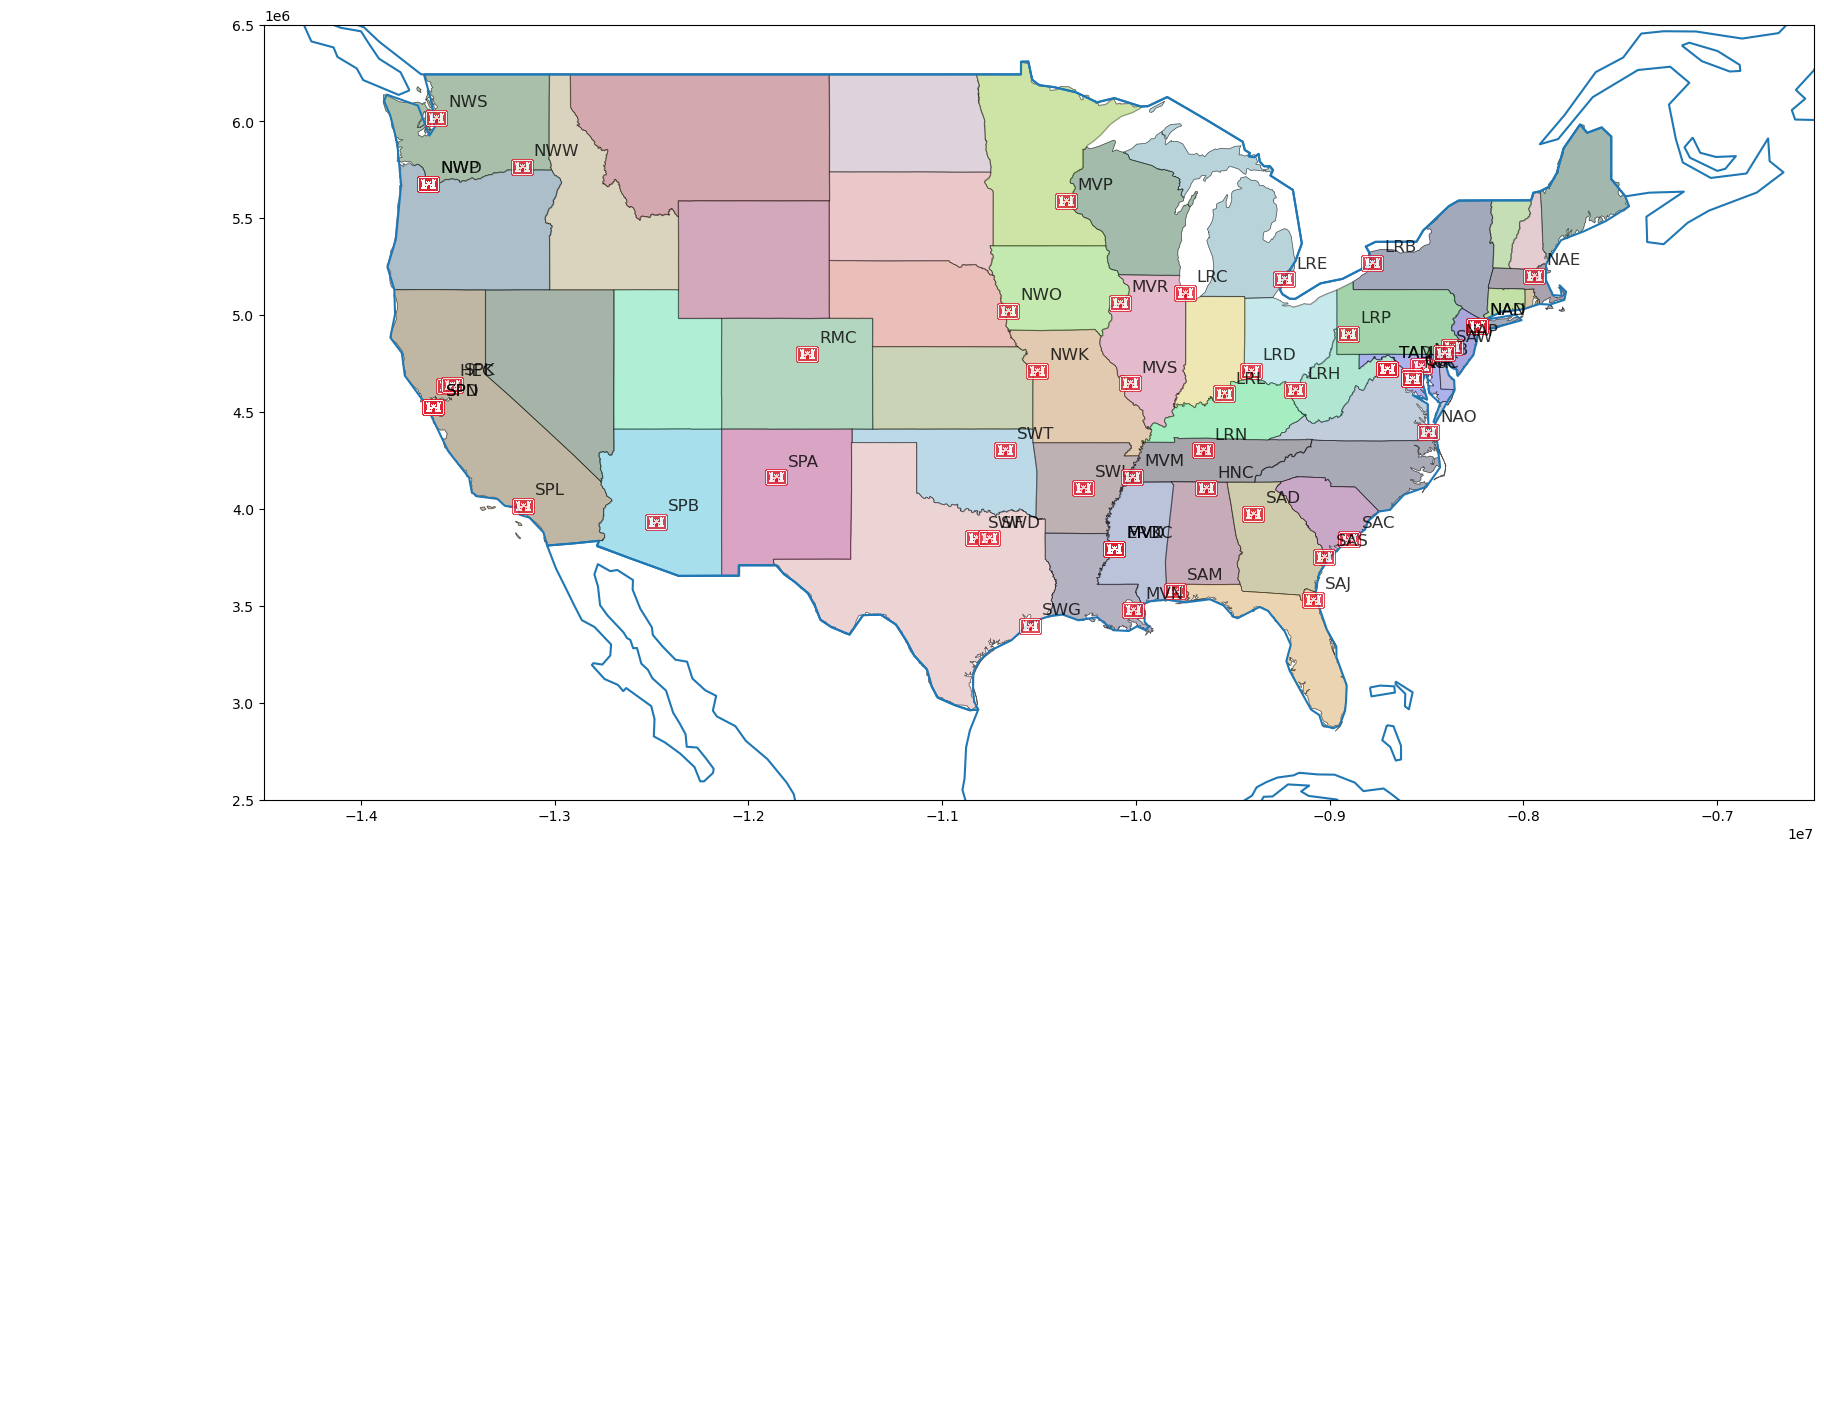

In [36]:
import copy
locations_to_plot = offices_mercator.Identifier.values
ax2 = offices.plot(figsize=(20,20), marker='o', color='red', markersize=20, alpha=0.5)
world_mercator.boundary.plot(ax=ax2)
states_mercator.plot(ax=ax2, alpha=0.5, color='lightgray', linewidth=0.5, edgecolor='black')
offices_mercator.plot(ax=ax2, marker='o', color='red', markersize=20)

for state_name in states_mercator.STATE_NAME.values:
    color = np.random.choice(colors)
    state = states_mercator.loc[states['STATE_NAME'] == state_name]
    state.plot(ax=ax2, alpha=0.3, color=color, linewidth=0.5, edgecolor='black')

for x, y, label in zip(offices_mercator.geometry.x, offices_mercator.geometry.y, offices_mercator.Identifier):
    im = OffsetImage(plt.imread(os.path.join('Corps_Castle.png'), format="png"), zoom=.04, alpha=0.8)
    ax2.add_artist(AnnotationBbox(im, (x, y), frameon=False))
    if label in locations_to_plot:
        ax2.annotate(label, xy=(x+40000, y+40000), xytext=(3, 3), size=12, textcoords="offset points", alpha=0.8)

ax2.set_xlim([-1.45e7,-0.65e7])
ax2.set_ylim([2.5e6,0.65e7])
# ax2.set_ylim([0.2,0.65e7])

In [11]:
# world.plot(column='pop_est', ax=ax, legend=True)
offices.to_excel('USACE_Offices_and_locations_output.xlsx')

In [12]:
offices_mercator.to_excel('USACE_Offices_and_locations_Mercator.xlsx')